In [1]:
#MIT License
#
#Copyright (c) 2020 Jaime Meléndez / Carlos Tellería
#
#Permission is hereby granted, free of charge, to any person obtaining a copy
#of this software and associated documentation files (the "Software"), to deal
#in the Software without restriction, including without limitation the rights
#to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
#copies of the Software, and to permit persons to whom the Software is
#furnished to do so, subject to the following conditions:
#
#The above copyright notice and this permission notice shall be included in all
#copies or substantial portions of the Software.
#
#THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
#IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
#FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
#AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
#LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
#OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
#SOFTWARE.
#

In [1]:
import itertools
import pandas as pd
import rmskmeans as rkm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time
from IPython.display import clear_output
import math

def compute_centers(dataset): #dataset must be['x','y','cluster']
    dt2 = dataset.groupby(['cluster']).agg({'cluster':'count', 'x': 'sum', 'y': 'sum'}).rename(columns={'cluster':'counter'})
    dt2['x'] = dt2.apply(lambda row: row.x/row.counter, axis=1)
    dt2['y'] = dt2.apply(lambda row: row.y/row.counter, axis=1)
    return dt2.drop(['counter'],axis=1)


calculando parejas más próximas
calculando nuevo cluster de cada punto
guardando nuevos centroides
process_time: 180.156250


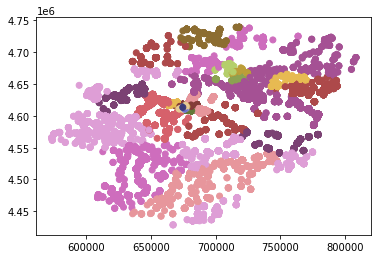

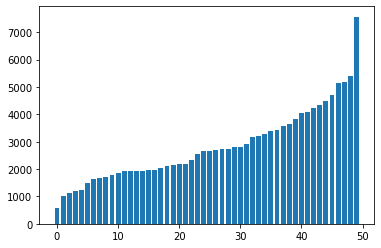

In [2]:
#Segundo nivel de cluster
tic = time.process_time()


name = 'def/clust1'
entry = 'def/clust'

centers = pd.read_csv(entry + '_centers.csv').rename(columns={'Unnamed: 0':'cluster'})
#data = pd.read_csv('100_800_2_rkm.csv')[['x','y','cluster']].dropna()
data = pd.read_csv(entry+'_rkm.csv')

hierarchy = []
new_clusters = 0

t = set(range(len(centers)))

while len(t) > 1:
    c = pd.DataFrame(set(itertools.combinations(t,2)))
    c['distance'] = c.apply(lambda row: rkm.l2_distance(centers.iloc[row[0]][['x','y']], centers.iloc[row[1]][['x','y']]), axis=1) 
    idxmin = c.idxmin()['distance']
    item = c.loc[idxmin].tolist() 
    clear_output(wait=True)
    print('calculando parejas más próximas')
    print(len(t), end='\r')
    hierarchy.append([item[0], new_clusters])
    t.remove(item[0])
    hierarchy.append([item[1], new_clusters])
    t.remove(item[1])
    new_clusters +=1
    c.drop(idxmin, axis=0, inplace=True)


hdf = pd.DataFrame(hierarchy).set_index([0])
hdf.to_csv('%s_hier.csv'%(name))

print('calculando nuevo cluster de cada punto')
data['cluster2'] = data.apply(lambda row: hdf.loc[row.cluster] if not math.isnan(row.cluster) else math.nan, axis=1)
data.to_csv('%s_rkm.csv'%(name))

print('guardando nuevos centroides')
centers2 = compute_centers(data[['x','y','cluster2']].rename(columns={'cluster2':'cluster'}))
pd.DataFrame(centers2, columns=['x','y']).to_csv('%s_centers.csv'%(name))


plt.figure(1)
plt.scatter(data['x'], data['y'], c=data['cluster2'], cmap='tab20b')
plt.savefig('%s_rkm.png'%(name))

distribution = data[['x','cluster2']].groupby('cluster2').count().sort_values(by=['x']).reset_index(drop=True).rename(columns={'x': "size"})
distribution.to_csv('%s_distrib.csv'%(name))
    
plt.figure(2)
plt.bar(distribution.index,distribution['size'])
plt.savefig('%s_dist.png'%(name))

toc = time.process_time()
print('process_time: %f'%(toc - tic))   

calculando parejas más próximas
calculando nuevo cluster de cada punto
guardando nuevos centroides
process_time: 97.921875


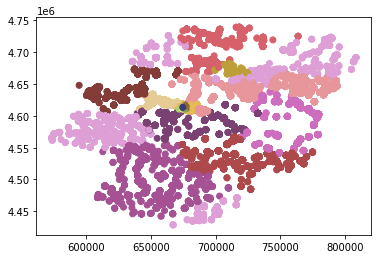

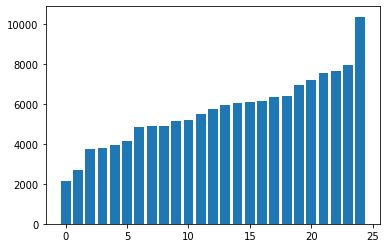

In [3]:
tic = time.process_time()

centers = pd.read_csv(name+'_centers.csv')
data = pd.read_csv(name+'_rkm.csv')
name1 = 'def/clust2'

hierarchy = []
new_clusters = 0

t = set(range(len(centers)))

while len(t) > 1:
    c = pd.DataFrame(set(itertools.combinations(t,2)))
    c['distance'] = c.apply(lambda row: rkm.l2_distance(centers.iloc[row[0]][['x','y']], centers.iloc[row[1]][['x','y']]), axis=1) 
    idxmin = c.idxmin()['distance']
    item = c.loc[idxmin].tolist() 
    clear_output(wait=True)
    print('calculando parejas más próximas')
    print(len(t), end='\r')
    hierarchy.append([item[0], new_clusters])
    t.remove(item[0])
    hierarchy.append([item[1], new_clusters])
    t.remove(item[1])
    new_clusters +=1
    c.drop(idxmin, axis=0, inplace=True)


hdf = pd.DataFrame(hierarchy).set_index([0])
hdf.to_csv('%s_hier.csv'%(name1))

print('calculando nuevo cluster de cada punto')
data['cluster3'] = data.apply(lambda row: hdf.loc[row.cluster2] if not math.isnan(row.cluster2) else math.nan, axis=1)
data.to_csv('%s_rkm.csv'%(name1))

print('guardando nuevos centroides')
centers3 = compute_centers(data[['x','y','cluster3']].rename(columns={'cluster3':'cluster'}))
pd.DataFrame(centers3, columns=['x','y']).to_csv('%s_centers.csv'%(name1))

plt.figure(1)
plt.scatter(data['x'], data['y'], c=data['cluster3'], cmap='tab20b')
plt.savefig('%s_rkm.png'%(name1))

distribution = data[['x','cluster3']].groupby('cluster3').count().sort_values(by=['x']).reset_index(drop=True).rename(columns={'x': "size"})
distribution.to_csv('%s_distrib.csv'%(name1))
    
plt.figure(2)
plt.bar(distribution.index,distribution['size'])
plt.savefig('%s_dist.png'%(name1))

data.dropna(subset=['cluster'],inplace=True)
data = data.drop('Unnamed: 0.1', axis=1)
data = data.drop('Unnamed: 0', axis=1)
data = data.drop('x', axis=1)
data = data.drop('y', axis=1)
data = data.drop('cluster2', axis=1)
data = data.drop('cluster3', axis=1)
data.to_csv('csv/definitivo.csv',index=False)

toc = time.process_time()
print('process_time: %f'%(toc - tic))   

In [4]:
hier1 = pd.read_csv(name+'_hier.csv').rename(columns={'1':'cluster2','0':'cluster'})
hier2 = pd.read_csv(name1+'_hier.csv').set_index(['0']).rename(columns={'1':'cluster3'})

hiert = hier1.join(hier2, on='cluster2')
hiert.to_csv('csv/cluster.csv',index=False)
hiert.to_csv(entry+'_hierarchy.csv',index=False)

In [5]:
#Unión de definitivo + cluster, para que se vea que forman todos los clusters
data = pd.read_csv('csv/definitivo.csv')
dataCluster = pd.read_csv('csv/cluster.csv', sep=',')
data = data.join(dataCluster.set_index('cluster'), on='cluster')
data

,id,sexo,fecha_nac,cias_cd,fec_hosp,alta_hosp,resultado_caso,hospital,categoría_caso,exitus_dt,ine11_cd,codpos,nacionalidad,paisnac,residencia,neighbour_cd,cluster,cluster2,cluster3
0,133373,1.0,1975-04-23,1004100102G,NaN,NaN,FU,NaN,CON,NaN,5.024700e+10,50629.0,724.0,724.0,False,1.500000e+01,63.0,17,8
1,1992,2.0,1961-08-29,1004200110P,NaN,NaN,UK,NaN,NOC,NaN,5.008900e+10,50410.0,724.0,724.0,False,5.008900e+10,54.0,26,14
2,143965,2.0,1945-10-05,1004200203D,2020-06-19,2020-06-27,UK,500021,NOC,NaN,5.006600e+10,50420.0,724.0,724.0,False,1.700000e+01,45.0,0,0
3,164737,2.0,2004-05-28,1003270101G,NaN,NaN,UK,NaN,NOC,NaN,5.029700e+10,50003.0,724.0,724.0,False,5.000300e+04,31.0,36,20
4,162876,1.0,1937-05-28,NaN,2020-08-18,2020-09-01,UK,220015,NOC,NaN,NaN,NaN,724.0,724.0,True,NaN,86.0,27,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141243,6419,2.0,1976-06-11,1003380205F,NaN,NaN,UK,NaN,NOC,NaN,5.029700e+10,50012.0,724.0,724.0,False,5.001200e+04,33.0,32,20
141244,102394,2.0,1965-01-22,1003040106D,2020-03-24,2020-03-28,UK,500055,NOC,NaN,5.029700e+10,50015.0,724.0,724.0,False,5.001500e+04,43.0,49,24
141245,156231,2.0,2016-07-21,1003250108K,NaN,NaN,UK,NaN,NOC,NaN,5.029700e+10,50013.0,724.0,724.0,False,5.001300e+04,91.0,27,10
141246,194325,1.0,2014-02-20,1003010102C,NaN,NaN,UK,NaN,INV,NaN,5.029700e+10,50018.0,724.0,724.0,False,5.001800e+04,41.0,16,11
